# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import openweathermapy.core as owm
from urllib.error import HTTPError
from citipy import citipy

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [58]:
# Print out a couple of the cities in the city list to see the results of the json and dictionary terms so I know 
# what information I want to append to the lists
count = 0
for city in cities:
    if count < 2:
        try:
            test_city = owm.get_current(city, **settings)
            pprint(test_city)
            count += 1
        except HTTPError:
            print("skip")
print("finished")

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -39.81, 'lon': -73.25},
 'dt': 1558627118,
 'id': 3868707,
 'main': {'humidity': 87,
          'pressure': 1023,
          'temp': 42.8,
          'temp_max': 42.8,
          'temp_min': 42.8},
 'name': 'Valdivia',
 'sys': {'country': 'CL',
         'id': 8526,
         'message': 0.0048,
         'sunrise': 1558612676,
         'sunset': 1558647711,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 290, 'speed': 3.36}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 77.48, 'lon': -69.36},
 'dt': 1558627319,
 'id': 3831208,
 'main': {'grnd_level': 974.13,
          'humidity': 80,
          'pressure': 1023.66,
          'sea_level': 1023.66,
          'temp': 31.73,
          'temp_max': 31.73,
          'temp_min': 31.

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
# Set my api key and my units for my API call
settings = {'appid':api_key,"units": "Imperial"}

In [4]:
# Build lists for datafram Series
city_list = []
cloudiness =[]
country = []
date = []
humid = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

# For loop to make an API call and print a log of each city as its processed with city number and city name
# The try/except allows for errors on the website so it doesn't break my API call
for city in cities:
    
    try:
        count += 1
        current_city = owm.get_current(city, **settings)
        print(f'Current city is {current_city["name"]} and the city number is: {current_city["id"]}')
        city_list.append(current_city['name'])
        cloudiness.append(current_city['clouds']['all'])
        country.append(current_city['sys']['country'])
        date.append(current_city['dt'])
        humid.append(current_city['main']['humidity'])
        lat.append(current_city['coord']['lat'])
        lng.append(current_city['coord']['lon'])
        max_temp.append(current_city['main']['temp_max'])
        wind_speed.append(current_city['wind']['speed'])
                   
    except HTTPError:
           print("City not found. Skipping...")
              
    print("------------")
# Print command so I know the loop is finished
print("\n")
print("------------")
print("Data Retrieval Complete")
print("------------")

Current city is Valdivia and the city number is: 3868707
------------
Current city is Qaanaaq and the city number is: 3831208
------------
Current city is Busselton and the city number is: 2075265
------------
Current city is Samarai and the city number is: 2132606
------------
Current city is Zaraza and the city number is: 3625066
------------
Current city is Sombrio and the city number is: 3447409
------------
Current city is Ushuaia and the city number is: 3833367
------------
Current city is Aksu and the city number is: 1524298
------------
Current city is Vaini and the city number is: 1273574
------------
Current city is Rikitea and the city number is: 4030556
------------
Current city is Port Elizabeth and the city number is: 4501427
------------
Current city is Teguldet and the city number is: 1489822
------------
City not found. Skipping...
------------
Current city is Castro and the city number is: 3896218
------------
Current city is Hilo and the city number is: 5855927
-----

Current city is Long Xuyen and the city number is: 1575627
------------
Current city is Pangnirtung and the city number is: 6096551
------------
Current city is Firminopolis and the city number is: 3463326
------------
Current city is Hobart and the city number is: 2163355
------------
Current city is Srednekolymsk and the city number is: 2121025
------------
Current city is Ossora and the city number is: 2122389
------------
Current city is Karratha and the city number is: 6620339
------------
Current city is Mehamn and the city number is: 778707
------------
Current city is Nanortalik and the city number is: 3421765
------------
City not found. Skipping...
------------
Current city is Lebu and the city number is: 344979
------------
Current city is Shache and the city number is: 1280037
------------
Current city is San Quintin and the city number is: 1688687
------------
Current city is Yerbogachen and the city number is: 2012956
------------
Current city is Lavrentiya and the city n

Current city is Ust-Tsilma and the city number is: 477940
------------
Current city is Nabire and the city number is: 1634614
------------
Current city is Mogadishu and the city number is: 53654
------------
Current city is Kaka and the city number is: 161901
------------
Current city is Dikson and the city number is: 1507390
------------
Current city is Chokurdakh and the city number is: 2126123
------------
Current city is Ongandjera and the city number is: 3354178
------------
Current city is Shenkursk and the city number is: 494884
------------
Current city is Hovd and the city number is: 7626384
------------
Current city is Hambantota and the city number is: 1244926
------------
City not found. Skipping...
------------
City not found. Skipping...
------------
Current city is Port Lavaca and the city number is: 4720067
------------
Current city is Tuatapere and the city number is: 2180815
------------
Current city is Pilibanga and the city number is: 1259688
------------
Current ci

Current city is Juanjui and the city number is: 3696057
------------
Current city is Vestmannaeyjar and the city number is: 3412093
------------
Current city is Dalvik and the city number is: 2702977
------------
Current city is Vardo and the city number is: 4372777
------------
Current city is Pingshan and the city number is: 6924979
------------
Current city is Biri and the city number is: 6453355
------------
Current city is Mahibadhoo and the city number is: 1337605
------------
Current city is Dunmanway and the city number is: 2964496
------------
Current city is Mandalgovi and the city number is: 2030065
------------
City not found. Skipping...
------------
Current city is Pangkalanbuun and the city number is: 1632694
------------
Current city is Den Helder and the city number is: 2757220
------------
Current city is Dongobesh and the city number is: 160172
------------
Current city is Kaoma and the city number is: 913323
------------
Current city is Lerwick and the city number i

Current city is Bacolod and the city number is: 1729564
------------
Current city is Qasigiannguit and the city number is: 3420768
------------
Current city is Rennes and the city number is: 2983990
------------
Current city is Sulingen and the city number is: 2824902
------------
Current city is Taiyuan and the city number is: 1793511
------------
Current city is Pathein and the city number is: 1328421
------------
Current city is Wewak and the city number is: 2083537
------------
Current city is Dir and the city number is: 2236015
------------
City not found. Skipping...
------------
Current city is Coihaique and the city number is: 3894426
------------
Current city is Dickinson and the city number is: 5688789
------------
Current city is Novaya Ladoga and the city number is: 519630
------------
Current city is Calamar and the city number is: 3687975
------------
Current city is Rafaela and the city number is: 3839479
------------
Current city is Spring Hill and the city number is: 4

Current city is Shiyan and the city number is: 1794903
------------
Current city is La Plata and the city number is: 3432043
------------
Current city is Baruun-Urt and the city number is: 2032614
------------
Current city is Monte Patria and the city number is: 3879429
------------


------------
Data Retrieval Complete
------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [56]:
# Build the dictionary for columns and rows
# Build the dataframe and print out for review

weather_dict = {"City": city_list, "Cloudiness":cloudiness, "Country":country, "Date": date, "Humidity":humid,
                "Lat":lat, "Lng":lng,"Max Temp":max_temp, "Wind Speed":wind_speed}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Valdivia,90,CL,1558616423,93,-39.81,-73.25,41.00,1.12
1,Qaanaaq,0,GL,1558616423,80,77.48,-69.36,29.21,4.76
2,Busselton,55,AU,1558616424,66,-33.64,115.35,55.00,12.41
3,Samarai,100,PG,1558616424,92,-10.62,150.67,73.85,3.44
4,Zaraza,98,VE,1558616424,76,9.35,-65.33,79.97,8.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

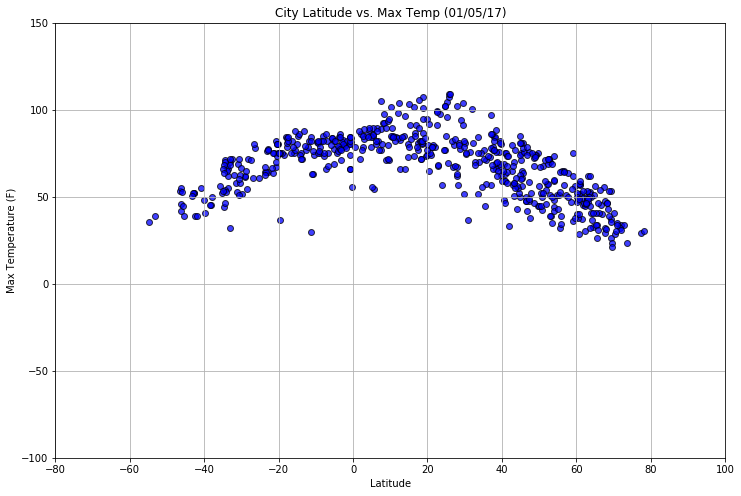

In [60]:
x = weather_df['Lat']
y = weather_df['Max Temp']
plt.figure(figsize=(12, 8))

plt.scatter(x, y, color='blue', edgecolors='black', alpha=0.75)

plt.title('City Latitude vs. Max Temp (01/05/17)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.xlim(-80, 100)
plt.ylim(-100, 150)



plt.show()

## Latitude vs. Humidity Plot

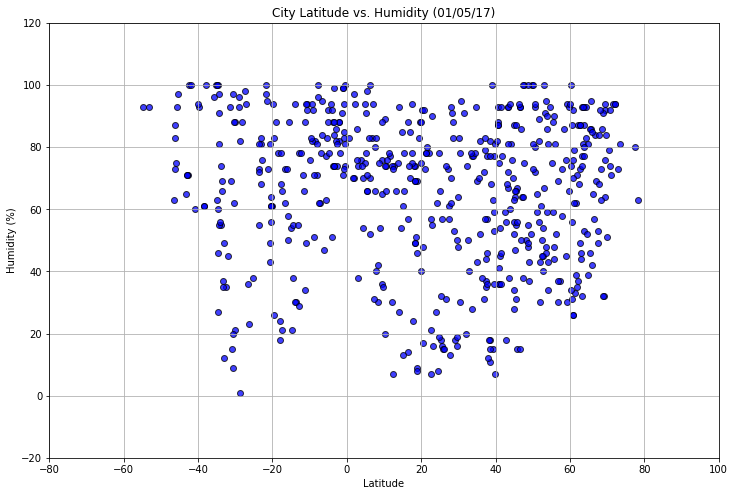

In [49]:
x = weather_df['Lat']
y = weather_df['Humidity']
plt.figure(figsize=(12, 8))

plt.scatter(x, y, color='blue', edgecolors='black', alpha=0.75)

plt.title('City Latitude vs. Humidity (01/05/17)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.xlim(-80, 100)
plt.ylim(-20, 120)


plt.show()

## Latitude vs. Cloudiness Plot

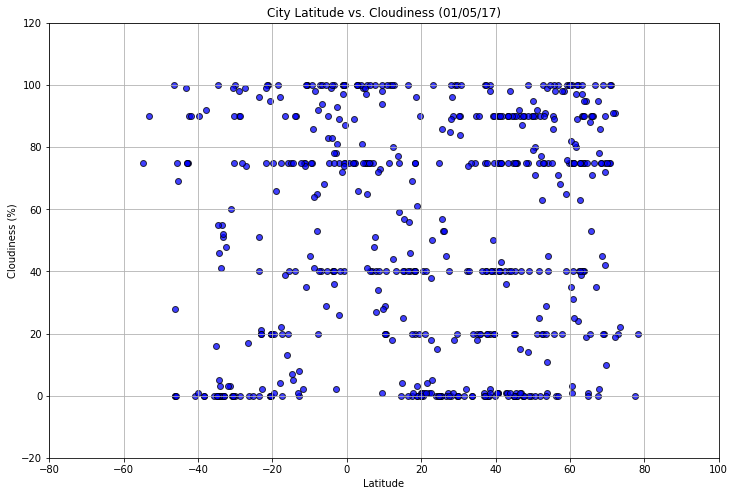

In [48]:
x = weather_df['Lat']
y = weather_df['Cloudiness']
plt.figure(figsize=(12, 8))

plt.scatter(x, y, color='blue', edgecolors='black', alpha=0.75)

plt.title('City Latitude vs. Cloudiness (01/05/17)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.xlim(-80, 100)
plt.ylim(-20, 120)


plt.show()

## Latitude vs. Wind Speed Plot

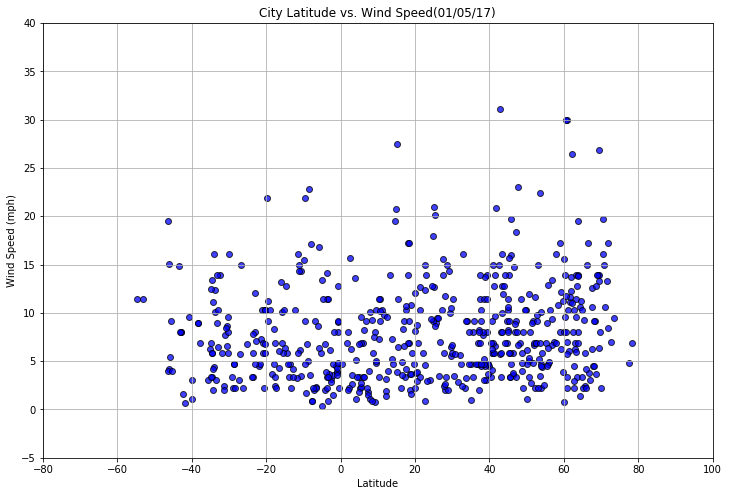

In [47]:
x = weather_df['Lat']
y = weather_df['Wind Speed']
plt.figure(figsize=(12, 8))

plt.scatter(x, y, color='blue', edgecolors='black', alpha=0.75)

plt.title('City Latitude vs. Wind Speed(01/05/17)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.xlim(-80, 100)
plt.ylim(-5, 40)


plt.show()